# Exploratory Analysis on Amenities

### Author: Xuan Amy Lin

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import Amyosaurus as amy
import scipy.stats as st

In [2]:
# Load Data
path = '~/Airbnb/'
df = pd.read_csv(path + 'listings.csv', sep = ',')

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Remove dollar sign from price
df['price'] = np.array([n[1:].replace(',','') for n in df['price']]).astype('float')

In [4]:
# Create a new dataframe to share amenity binary variables
amenities_df = df[['id', 'amenities', 'price', 'number_of_reviews']].copy()
amenities_df['amenities_list'] = [x[1:-1].replace("'",'').replace('"', '').replace(' ', '').split(',') 
                                   for x in amenities_df['amenities']]

# Find all distinct amenities & calculate amenity coverages
all_amenities = []
for n in amenities_df['amenities_list']:
    all_amenities += n
all_amenities = np.unique(np.array(all_amenities),return_counts = 1)
all_amenities = pd.Series(all_amenities[1]/df.shape[0], index = all_amenities[0])
all_amenities = all_amenities.sort_values(ascending = False)

In [5]:
# Total 130 amenities
a_list = all_amenities.index # This list will be used to create columns
len(a_list)

130

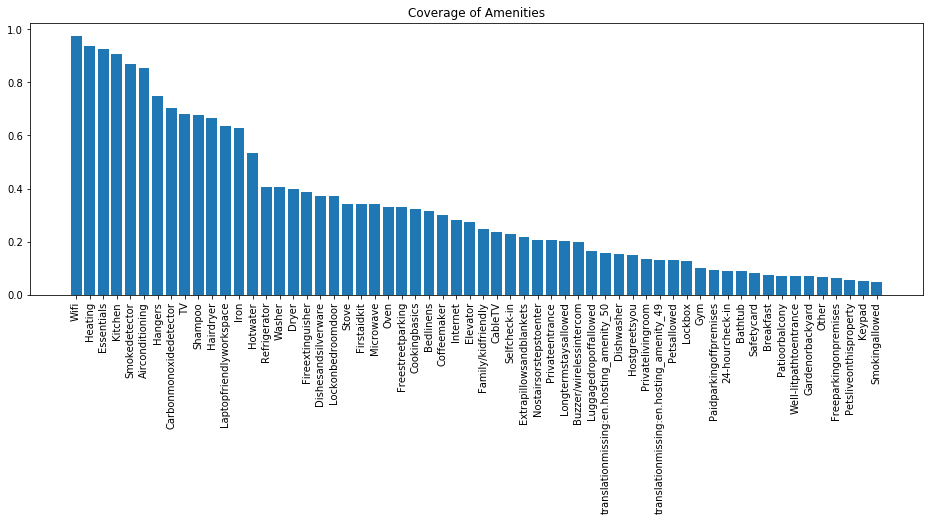

In [6]:
# Plot amenity coverage
plt.figure(figsize=(16,5))
top_n = 60
plt.bar(range(top_n), all_amenities.values[:top_n])
plt.xticks(range(top_n), all_amenities.index[:top_n], rotation = 90)
plt.title("Coverage of Amenities")
plt.show()

In [7]:
N = amenities_df.shape[0]
amenities_bin = [0]*N
for i in range(N):
    candidate = amenities_df['amenities_list'][i]
    amenities_bin[i] = [n in candidate for n in a_list]
    if i%10000 == 0:
        print("{} rows completed".format(i))

0 rows completed
10000 rows completed
20000 rows completed
30000 rows completed
40000 rows completed
50000 rows completed


In [8]:
# Combine binary variables with the amenity dataframe
amenities_df = pd.concat([amenities_df, pd.DataFrame(amenities_bin, columns = a_list).astype('int')], axis = 1)
#amenities_df.to_csv(path + 'amenities_df.csv') # save csv file just in case

In [9]:
amenities_df.head()

,id,amenities,price,number_of_reviews,amenities_list,Wifi,Heating,Essentials,Kitchen,Smokedetector,...,Fullkitchen,Ski-in/Ski-out,Washer/Dryer,Privatebathroom,Groundflooraccess,Mobilehoist,Airpurifier,Poolwithpoolhoist,Ceilinghoist,Kitchenette
0,2595,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225.0,48,"[TV, Wifi, Airconditioning, Kitchen, Paidparki...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3831,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89.0,295,"[TV, CableTV, Internet, Wifi, Airconditioning,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5099,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,78,"[TV, CableTV, Internet, Wifi, Airconditioning,...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5121,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60.0,49,"[Wifi, Airconditioning, Kitchen, Petsliveonthi...",1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5178,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79.0,454,"[TV, Wifi, Airconditioning, Paidparkingoffprem...",1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Gut check against the plot. Looking good.
amenities_df.iloc[:,4:].sum()

### Analysis

In [10]:
# Eliminate outliers from dataset
df_ = amenities_df[(amenities_df.price <= 500) & (amenities_df.number_of_reviews > 0)]
df_.shape

(39745, 135)

In [11]:
# Function that outputs T-Test results
def test_diff(a, b):
    return [abs(b.median()-a.median()),
           st.ttest_ind(a, b)[1]]

In [12]:
# Generate T-Test results for amenities
price_diff = [0] * 130
for i in range(130):
    price_diff[i] = test_diff(df_[df_[a_list[i]] == 0]['price'], df_[df_[a_list[i]] == 1]['price'])

# Create a dataframe
price_diff = pd.DataFrame(np.round(np.array(price_diff), 6), columns = ["median_diff", "p_value"])
price_diff['amenity'] = a_list
price_diff['coverage'] = all_amenities.values

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
price_diff

,median_diff,p_value,amenity,coverage
0,11.0,0.000000,Wifi,0.975494
1,18.0,0.000000,Heating,0.937983
2,11.0,0.000000,Essentials,0.925334
3,25.0,0.000000,Kitchen,0.907903
4,7.0,0.000000,Smokedetector,0.870788
5,38.0,0.000000,Airconditioning,0.852803
6,3.0,0.000000,Hangers,0.748829
7,6.0,0.000000,Carbonmonoxidedetector,0.704105
8,40.0,0.000000,TV,0.680349
9,20.0,0.000000,Shampoo,0.678551


In [24]:
# Decide on the amenities I care about
# p-value < 0.05: 130 -> 93 amenties
# coverage > 0.05: -> 55
# mean_diff > 5:  -> 44    Sounds reasonable
imp_amenities = price_diff[(price_diff['p_value']<=0.05) & (price_diff['coverage'] > 0.05) & (price_diff['median_diff'] > 5)]
imp_amenities

,median_diff,p_value,amenity,coverage
0,11.0,0.000000,Wifi,0.975494
1,18.0,0.000000,Heating,0.937983
2,11.0,0.000000,Essentials,0.925334
3,25.0,0.000000,Kitchen,0.907903
4,7.0,0.000000,Smokedetector,0.870788
5,38.0,0.000000,Airconditioning,0.852803
7,6.0,0.000000,Carbonmonoxidedetector,0.704105
8,40.0,0.000000,TV,0.680349
9,20.0,0.000000,Shampoo,0.678551
10,20.0,0.000000,Hairdryer,0.664321


#### Plot out a few selected amenities to gut check the quality of analysis

In [25]:
len(imp_amenities)

44

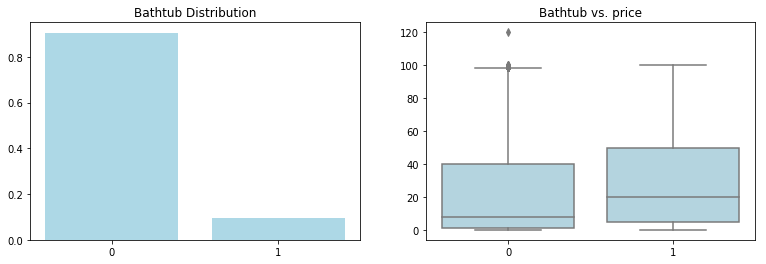

In [166]:
amy.plot_cat(df_, 'Bathtub', 'price')

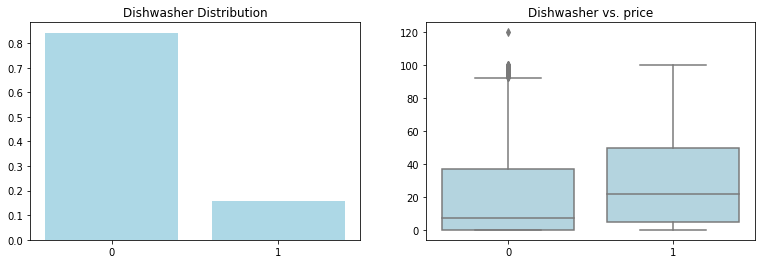

In [167]:
amy.plot_cat(df_, 'Dishwasher', 'price')

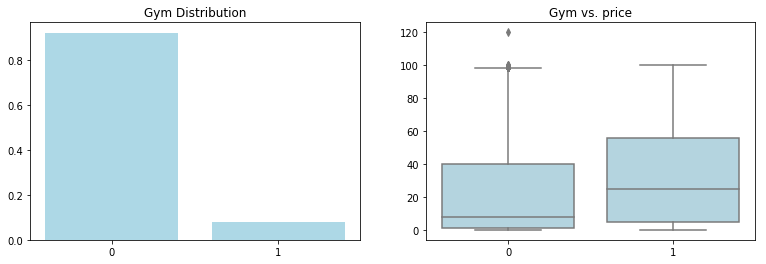

In [168]:
amy.plot_cat(df_, 'Gym', 'price')

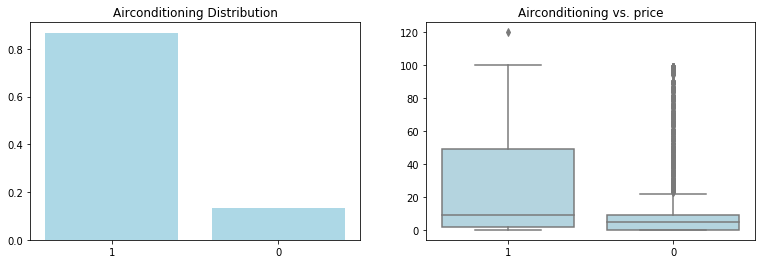

In [134]:
amy.plot_cat(df_, 'Airconditioning', 'price')

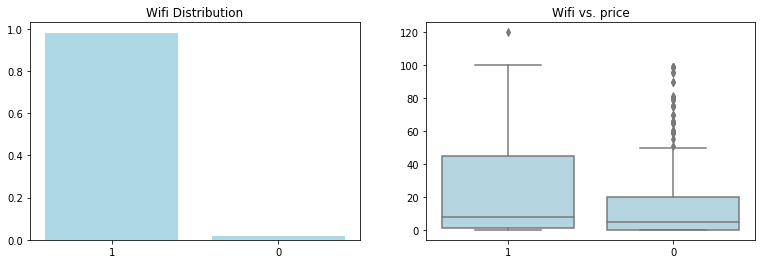

In [169]:
amy.plot_cat(df_, 'Wifi', 'price')
# Outliers might distort the result a bit but the t-test is still significant

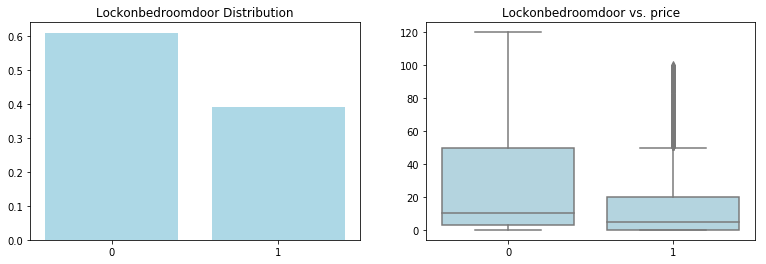

In [170]:
amy.plot_cat(df_, 'Lockonbedroomdoor', 'price')